In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls -a

.  ..  .config	drive  sample_data


In [2]:
!pip install transformers

     |████████████████████████████████| 1.9MB 11.3MB/s 
     |████████████████████████████████| 3.2MB 46.5MB/s 
     |████████████████████████████████| 890kB 45.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=c211f04faadd450ba98f53f1ac7935cfac02d82e590ff2aa1f18baef3e41c207
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [3]:
import sys
import numpy as np
import pandas as pd
import random as rn
import torch
from torch import nn
from transformers import *
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import Adam
from torch.nn.utils import clip_grad_norm_
from IPython.display import clear_output

In [4]:
rn.seed(321)
np.random.seed(321)
torch.manual_seed(321)
torch.cuda.manual_seed(321)

In [5]:
from transformers import *

class GlobalBERT:
    def __init__(self):
        self.model_class, self.tokenizer_class, self.pretrained_weights = (BertModel, BertTokenizer, 'bert-large-cased')

        self.tokenizer = self.tokenizer_class.from_pretrained(self.pretrained_weights)
        self.model = self.model_class.from_pretrained(self.pretrained_weights, output_hidden_states=True)

    def from_sentence_to_embedding(self, text, use_special_tokens=True):
        raise Exception

class BERT11Sense(GlobalBERT):
    def __init__(self):
        super().__init__()

    def from_sentence_to_embedding(self, text, use_special_tokens=True):
        input_ids = torch.tensor([self.tokenizer.encode(text,
                                                   add_special_tokens=use_special_tokens)])
        outputs = self.model(input_ids)[2]
        return (outputs[12][0]).detach().numpy()
       
       
bb = BERT11Sense()


bb.from_sentence_to_embedding("hello darling")

array([[ 0.5389184 ,  1.0641234 ,  0.06854305, ...,  0.49491495,
        -0.4562714 ,  0.91966647],
       [ 0.1927456 , -1.5048002 , -0.03996078, ...,  0.22079027,
        -0.8769877 ,  0.8757977 ],
       [-0.86593896, -1.0224617 , -0.85344225, ...,  0.34580922,
        -0.14207263,  0.3716698 ],
       [ 0.09797873, -0.00276923,  0.04644002, ...,  0.36611384,
        -0.05931376, -0.04601862]], dtype=float32)

In [6]:
%cd drive/My Drive/Colab Notebooks/experiments/data

/content/drive/My Drive/Colab Notebooks/experiments/data


In [7]:
df = pd.read_csv('trofi.csv')

In [8]:
df.head(3)

,verb,sentence,verb_idx,label
0,absorb,An Energy Department spokesman says the sulfur...,22,0
1,absorb,The yellow beta carotene pigment absorbs blue ...,5,0
2,absorb,"This time , the ground absorbed the shock wave...",5,0


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [10]:
import sklearn

In [11]:
train, test = sklearn.model_selection.train_test_split(df, train_size=6, test_size=4)

In [12]:
train.head(3)

,verb,sentence,verb_idx,label
968,lend,The IDA also will lend $ 17.6 million to the Y...,4,0
884,kill,A court in London sentenced an American member...,18,0
802,kick,Meetings degenerated into shouting matches ; a...,11,0


In [13]:
test.head(3)

,verb,sentence,verb_idx,label
3660,touch,"Still , it 's a flinty character indeed who wo...",12,1
1256,pump,A prepared statement from Dr. Lenfant 's offic...,40,0
155,destroy,He arrived in the U.S. last month after bulldo...,11,0


In [14]:
bb.tokenizer.tokenize('Hi my name is Dima')

['Hi', 'my', 'name', 'is', 'Di', '##ma']

In [ ]:
(bb.from_sentence_to_embedding('He absorbed the knowledge or beliefs of his tribe'))[0][0:11]

array([-0.3964905 ,  0.6026025 ,  0.6314686 , -0.7780536 ,  0.11271936,
       -0.30086   , -1.1320194 ,  0.08013009, -0.07451884, -0.5060913 ,
       -0.3941079 ], dtype=float32)

In [ ]:
X = np.mean(bb.from_sentence_to_embedding('He absorbed the knowledge or beliefs of his tribe'), axis = 0)[0:11]

In [15]:
embeddings = [np.mean(bb.from_sentence_to_embedding(k), axis = 0) for k in df["sentence"].values]

In [16]:
embeddings = np.array(embeddings)
embeddings.shape

(3737, 1024)

In [17]:
embeddings

array([[ 0.18056169,  0.0181018 ,  0.15268123, ..., -0.28198478,
        -0.0721458 , -0.05901246],
       [-0.04719486, -0.4019269 ,  0.00227878, ..., -0.20136242,
         0.01267892, -0.06542837],
       [-0.12756924, -0.06352129,  0.20411444, ..., -0.32732472,
        -0.0981987 , -0.08835676],
       ...,
       [ 0.10345866, -0.02029929, -0.01852234, ..., -0.43761402,
         0.19848403,  0.23581892],
       [-0.1052748 , -0.07193143, -0.08385593, ..., -0.38159218,
         0.10806539,  0.08850934],
       [ 0.14932583, -0.07100984, -0.11876794, ..., -0.2659254 ,
         0.25280693,  0.02902835]], dtype=float32)

In [ ]:
#np.save('mohx_bert.npy', embeddings)

In [ ]:
#bert_mohx = np.load(open('mohx_bert.npy', 'rb'))

In [ ]:
#!ls -a

In [18]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
# Logistic Regression
lr = LogisticRegression()
predictions = cross_val_predict(lr, embeddings, df["label"].values, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [22]:
class_names = ["Literal", "Metaphorical"]

In [23]:
from sklearn.metrics import classification_report

print(classification_report(df["label"].values, predictions, target_names=class_names))

              precision    recall  f1-score   support

     Literal       0.58      0.59      0.58      2110
Metaphorical       0.45      0.44      0.45      1627

    accuracy                           0.53      3737
   macro avg       0.52      0.52      0.52      3737
weighted avg       0.52      0.53      0.52      3737



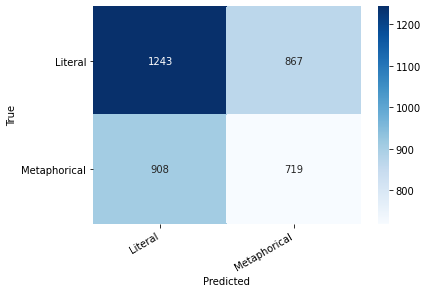

In [24]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

y_val = df["label"].values
y_pred = predictions

def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True')
  plt.xlabel('Predicted');

cm = confusion_matrix(y_val, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)